In [1]:
import numpy as np
import matplotlib.pyplot as plt

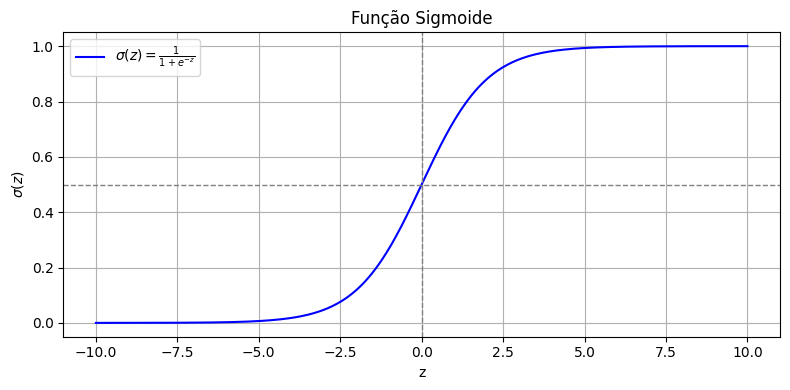

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Domínio para plotar
z = np.linspace(-10, 10, 400)
s = sigmoid(z)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(z, s, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.title("Função Sigmoide")
plt.xlabel("z")
plt.ylabel(r'$\sigma(z)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
# Gerar dados sintéticos
np.random.seed(0)
n = 100
X = np.linspace(-5, 5, n)
true_beta = 1.0


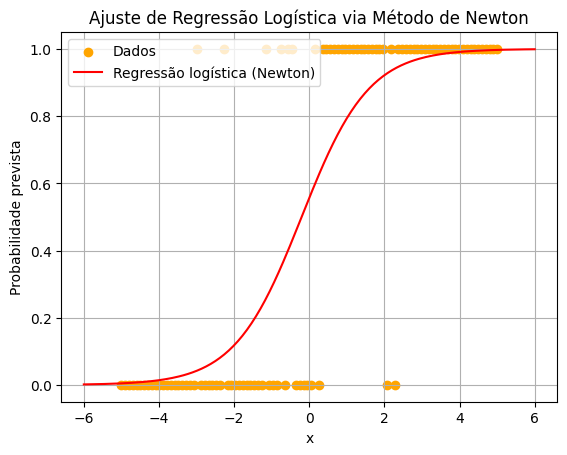

(None, array([0.22774156, 1.11938151]))

In [4]:
probs = sigmoid(true_beta * X)
Y = np.random.binomial(1, probs)

# Construir matriz de design com intercepto
X_design = np.column_stack((np.ones(n), X))  # [1, x_i]

# Método de Newton implementado do zero
def newton_logistic_manual(X, Y, max_iter=100, tol=1e-6):
    beta = np.ones(X.shape[1])
    for _ in range(max_iter):
        z = X @ beta
        p = sigmoid(z)
        grad = X.T @ (Y - p)
        W = np.diag(p * (1 - p))
        H = -X.T @ W @ X
        delta = np.linalg.solve(H, grad)
        beta_new = beta - delta
        if np.linalg.norm(beta_new - beta) < tol:
            break
        beta = beta_new
    return beta

beta_hat_manual = newton_logistic_manual(X_design, Y)

# Plotar resultado
x_plot = np.linspace(-6, 6, 200)
X_plot_design = np.column_stack((np.ones_like(x_plot), x_plot))
y_plot = sigmoid(X_plot_design @ beta_hat_manual)

plt.scatter(X, Y, label='Dados', color='orange')
plt.plot(x_plot, y_plot, color='red', label='Regressão logística (Newton)')
plt.xlabel("x")
plt.ylabel("Probabilidade prevista")
plt.title("Ajuste de Regressão Logística via Método de Newton")
plt.legend()
plt.grid(True)
plt.show(), beta_hat_manual